In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ElectricCarData_Clean - ElectricCarData_Clean.csv.csv")

In [27]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940,Yes,AWD,Type 2 CCS,Sedan,D,5.0,55480.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250,Yes,RWD,Type 2 CCS,Hatchback,C,5.0,30000.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df = df[["Brand", "Model", "Efficiency_WhKm", "BodyStyle", "PriceEuro"]]
df = df.rename({"Efficiency_WhKm": "Efficiency"}, axis=1)
df.head()

,Brand,Model,Efficiency,BodyStyle,PriceEuro
0,NaN,NaN,NaN,NaN,NaN
1,Tesla,Model 3 Long Range Dual Motor,161.0,Sedan,55480.0
2,NaN,NaN,NaN,NaN,NaN
3,Volkswagen,ID.3 Pure,167.0,Hatchback,30000.0
4,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df[df["Efficiency"].notnull()]
df.head()

,Brand,Model,Efficiency,BodyStyle,PriceEuro
1,Tesla,Model 3 Long Range Dual Motor,161.0,Sedan,55480.0
3,Volkswagen,ID.3 Pure,167.0,Hatchback,30000.0
5,Polestar,2,181.0,Liftback,56440.0
7,BMW,iX3,206.0,SUV,68040.0
9,Honda,e,168.0,Hatchback,32997.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       103 non-null    object 
 1   Model       103 non-null    object 
 2   Efficiency  103 non-null    float64
 3   BodyStyle   103 non-null    object 
 4   PriceEuro   103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


In [31]:
df = df.dropna()
df.isnull().sum()

Brand         0
Model         0
Efficiency    0
BodyStyle     0
PriceEuro     0
dtype: int64

In [32]:
df = df[df["BodyStyle"] == "Hatchback"]
df = df.drop("BodyStyle", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       32 non-null     object 
 1   Model       32 non-null     object 
 2   Efficiency  32 non-null     float64
 3   PriceEuro   32 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


In [33]:
df['Brand'].value_counts()

Volkswagen    7
Nissan        7
Renault       4
Honda         2
BMW           2
Smart         2
Peugeot       1
Mini          1
Opel          1
CUPRA         1
Skoda         1
SEAT          1
Sono          1
Fiat          1
Name: Brand, dtype: int64

In [34]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [35]:
Brand_map = shorten_categories(df.Brand.value_counts(), 1)
df['Brand'] = df['Brand'].map(Brand_map)
df.Brand.value_counts()

Volkswagen    7
Nissan        7
Renault       4
Honda         2
BMW           2
Smart         2
Peugeot       1
Mini          1
Opel          1
CUPRA         1
Skoda         1
SEAT          1
Sono          1
Fiat          1
Name: Brand, dtype: int64

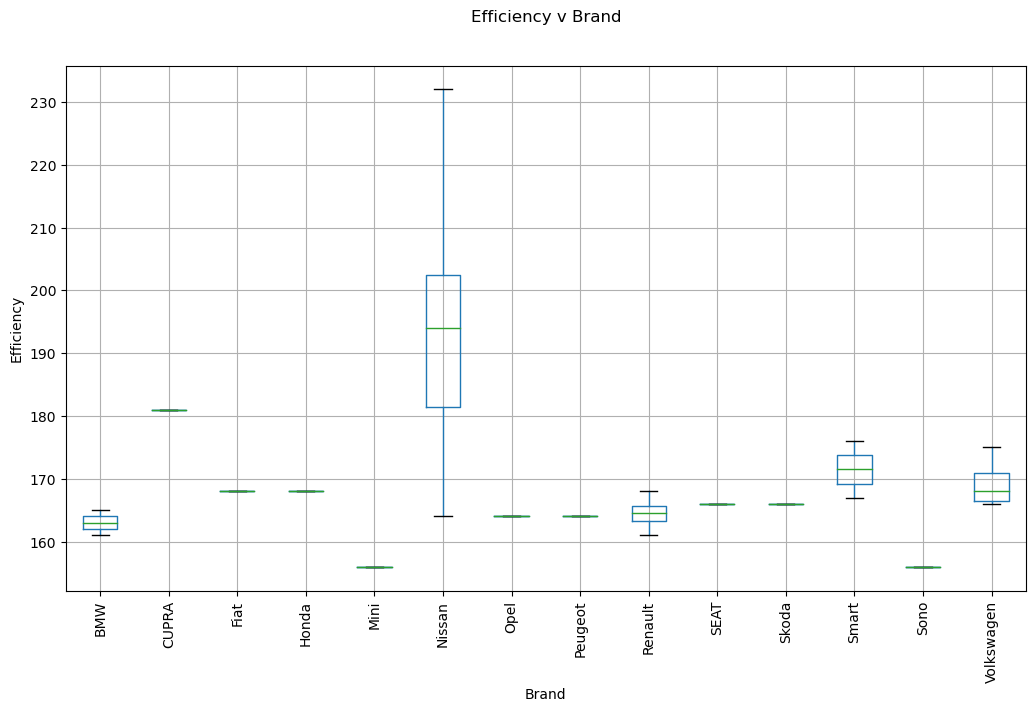

In [36]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Efficiency', 'Brand', ax=ax)
plt.suptitle('Efficiency v Brand')
plt.title('')
plt.ylabel('Efficiency')
plt.xticks(rotation=90)
plt.show()

In [37]:
df = df[df["Efficiency"] <= 500]
df = df[df["Efficiency"] >= 50]
df = df[df['Brand'] != 'Other']

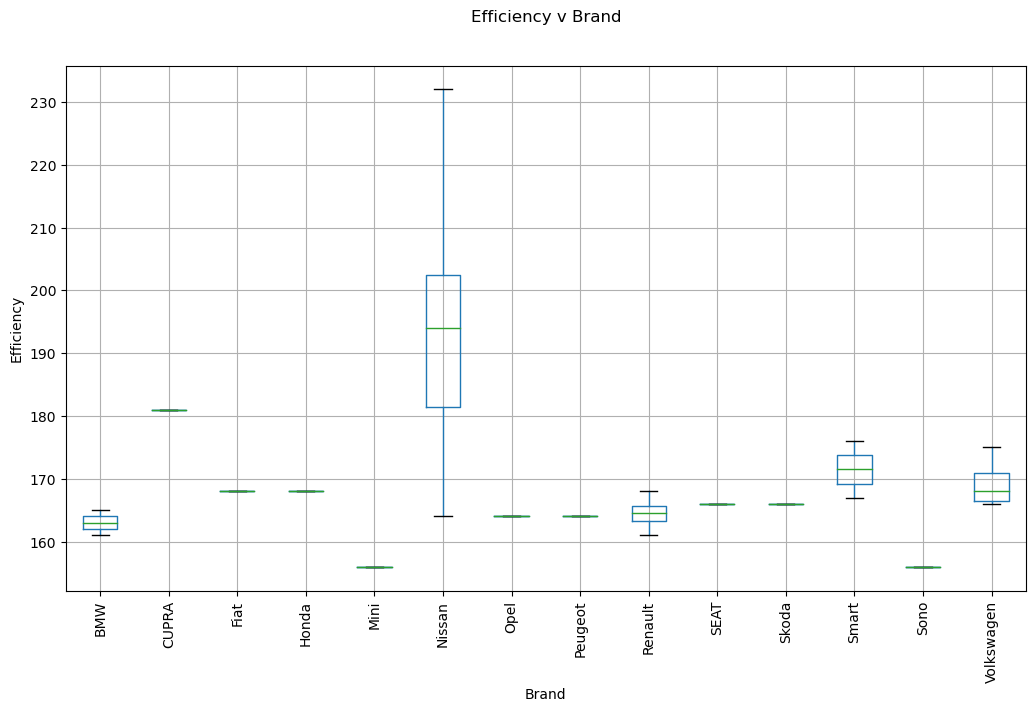

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Efficiency', 'Brand', ax=ax)
plt.suptitle('Efficiency v Brand')
plt.title('')
plt.ylabel('Efficiency')
plt.xticks(rotation=90)
plt.show()

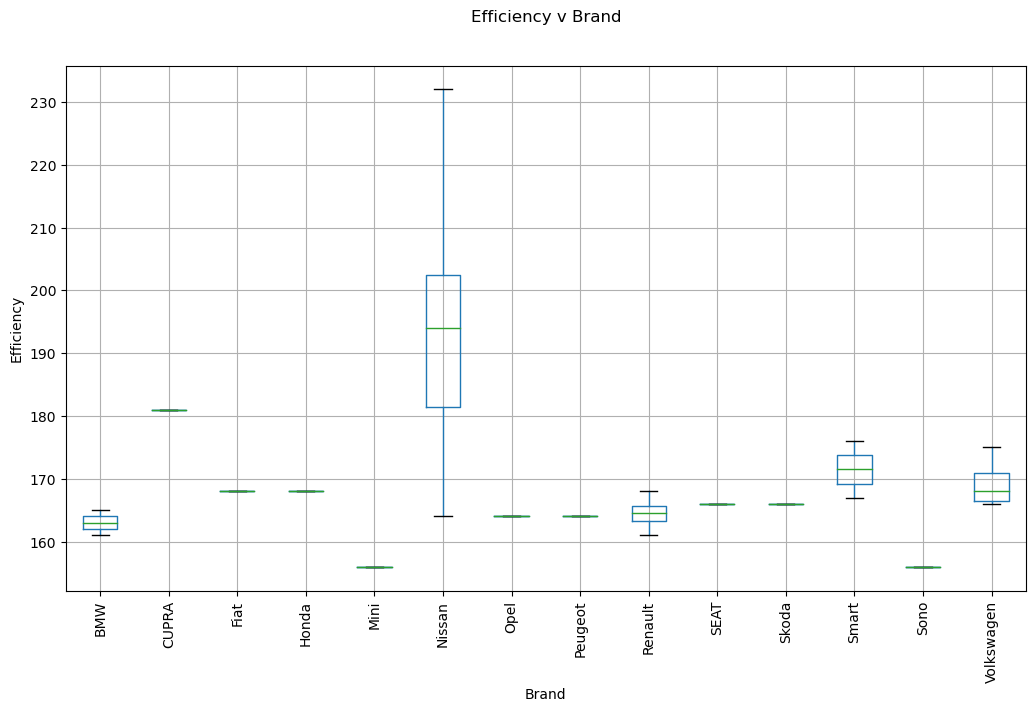

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Efficiency', 'Brand', ax=ax)
plt.suptitle('Efficiency v Brand')
plt.title('')
plt.ylabel('Efficiency')
plt.xticks(rotation=90)
plt.show()

In [40]:
df["PriceEuro"].unique()

array([30000., 32997., 31900., 29682., 29234., 40936., 21421., 31681.,
       29146., 33000., 38017., 31184., 37237., 45000., 33133., 24534.,
       20129., 35921., 24790., 50000., 41526., 25500., 22030., 38987.,
       21387., 34900., 57500., 35575., 65000.])

In [41]:
df["Efficiency"].unique()

array([167., 168., 164., 175., 166., 156., 161., 165., 172., 181., 198.,
       176., 171., 207., 191., 194., 232.])

In [42]:
from sklearn.preprocessing import LabelEncoder
le_efficiency = LabelEncoder()
df['Efficiency'] = le_efficiency.fit_transform(df['Efficiency'])
df["Efficiency"].unique()

array([ 5,  6,  2,  9,  4,  0,  1,  3,  8, 11, 14, 10,  7, 15, 12, 13, 16],
      dtype=int64)

In [43]:
le_Brand = LabelEncoder()
df['Brand'] = le_Brand.fit_transform(df['Brand'])
df["Brand"].unique()

array([13,  3,  7,  5,  4,  6,  0,  8,  1, 10,  9, 12, 11,  2])

In [45]:
X = df.drop("Efficiency", axis=1)
y = df["Efficiency"]

In [46]:
from sklearn.linear_model import LinearRegression

In [44]:
le_Model = LabelEncoder()
df['Model'] = le_Model.fit_transform(df['Model'])
df["Model"].unique()

array([15, 24, 27, 26, 16, 14, 28,  7,  8, 12, 30, 22, 17, 29, 23,  6, 18,
       25, 20, 21,  2, 31, 19,  9, 11, 10,  0,  4, 13,  1,  3,  5])

In [47]:
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [48]:
y_pred = linear_reg.predict(X)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [50]:
error

2.4562618761087514

In [51]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [52]:
y_pred = dec_tree_reg.predict(X)

In [53]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

0.00


In [54]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [55]:
y_pred = random_forest_reg.predict(X)

In [56]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

0.84


In [57]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [58]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

0.85


In [59]:
X

,Brand,Model,PriceEuro
3,13,15,30000.0
9,3,24,32997.0
13,13,27,31900.0
15,7,26,29682.0
23,5,16,29234.0
31,13,14,40936.0
35,13,28,21421.0
39,4,7,31681.0
41,6,8,29146.0
53,13,12,33000.0


In [60]:
print(le_Brand.classes_.tolist())

['BMW', 'CUPRA', 'Fiat', 'Honda', 'Mini', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'SEAT', 'Skoda', 'Smart', 'Sono', 'Volkswagen']


In [61]:
print(le_Model.classes_.tolist())

['500e Hatchback', 'Ariya 63kWh', 'Ariya 87kWh', 'Ariya e-4ORCE 63kWh', 'Ariya e-4ORCE 87kWh', 'Ariya e-4ORCE 87kWh Performance', 'CITIGOe iV', 'Cooper SE', 'Corsa-e', 'EQ forfour', 'EQ fortwo coupe', 'ID.3 1st', 'ID.3 Pro', 'ID.3 Pro Performance', 'ID.3 Pro S', 'ID.3 Pure', 'Leaf', 'Leaf e+', 'Mii Electric', 'Sion', 'Twingo ZE', 'Zoe ZE40 R110', 'Zoe ZE50 R110', 'Zoe ZE50 R135', 'e', 'e Advance', 'e-208', 'e-Golf', 'e-Up!', 'el-Born', 'i3 120 Ah', 'i3s 120 Ah']


In [62]:
print(le_efficiency.classes_.tolist())


[156.0, 161.0, 164.0, 165.0, 166.0, 167.0, 168.0, 171.0, 172.0, 175.0, 176.0, 181.0, 191.0, 194.0, 198.0, 207.0, 232.0]


In [65]:
X = np.array([["Honda", 'e', 32997]])
X


array([['Honda', 'e', '32997']], dtype='<U11')

In [66]:
X[:, 0] = le_Brand.transform(X[: ,0])
X[:, 1] = le_Model.transform(X[:,1])
X = X.astype(float)
X 

array([[3.0000e+00, 2.4000e+01, 3.2997e+04]])

In [67]:
y_pred = regressor.predict(X)
y_pred


C:\Users\Kaviena Sharon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.4185])

In [69]:
import pickle


In [70]:
data = {"model": regressor, "le_Brand": le_Brand, "le_Model": le_Model}
with open('survey_sparrow.pkl', 'wb') as file:
    pickle.dump(data, file)


In [71]:
with open('survey_sparrow.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_Brand = data["le_Brand"]
le_Model = data["le_Model"]


In [72]:
y_pred = regressor_loaded.predict(X)
y_pred


C:\Users\Kaviena Sharon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.4185])